In [1]:
%matplotlib inline

from pymc3 import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Generating the data
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
#y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise 
y = true_regression_line + np.random.normal(scale=0.5, size=size)

data = dict(x=x, y=y)

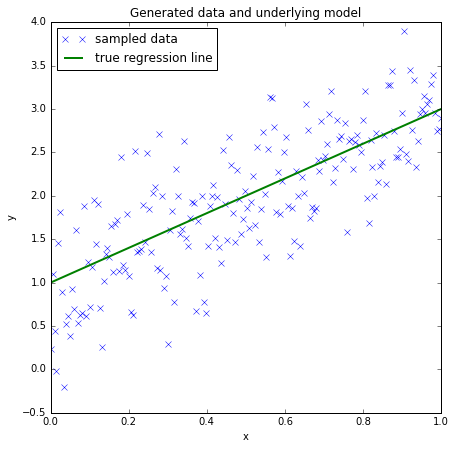

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label = "sampled data")
ax.plot(x, true_regression_line, label = 'true regression line', lw=2.)
plt.legend(loc=0)

In [26]:
### Estimating the model

with Model() as model: # model specs in PYMC3 are always wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10, testval=1.)
    intercept = Normal("Intercept", 0, sd=20)
    x_coeff = Normal("x", 0, sd=20)
    
    # Define likelihood
    likelihood = Normal("y", mu=intercept + x_coeff*x, sd=sigma, observed=y)
    
    # Inference !
    start = find_MAP() #find starting value by optimization
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, start=start, progressbar=False) # draw 2000 posterior samples with NUTS

Applied log-transform to sigma and added transformed sigma_log to model.


In [6]:
### Another way to do the above estimation...

with Model() as model:
    # specify glm and pass in data. 
    # the resulting linear model, its likelihood, and parameters are
    # automatically added to our model
    glm.glm('y ~ x', data)
    start = find_MAP()
    step = NUTS(scaling=start)
    trace = sample(2000, step, progressbar=False)

Applied log-transform to sd and added transformed sd_log to model.


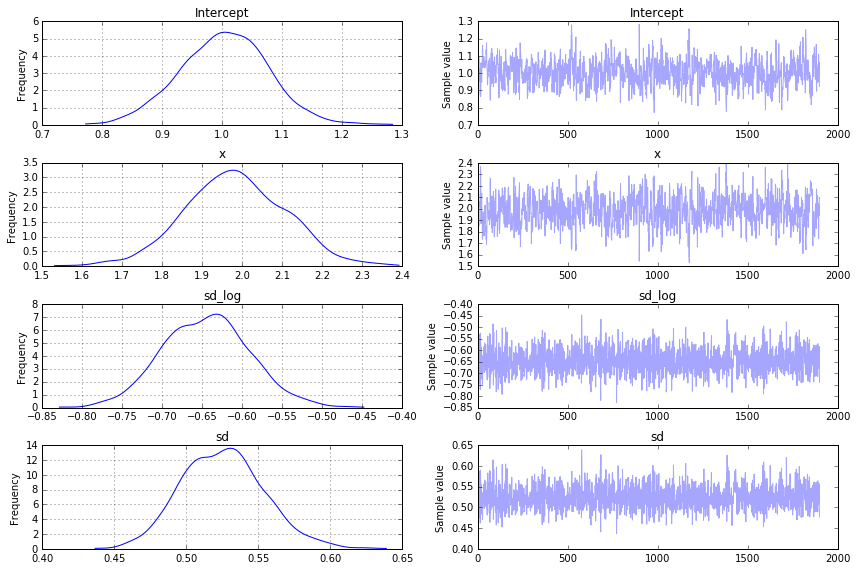

In [7]:
### Analyzing the model
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout()

In [27]:
# the glm.plot_posterior_predictive() takes multiple samples from the
# above posterior parameter distributions and plots regression lines

plt.figure(figsize=(7,7))
plt.plot(x, y, 'x', label='data')
glm.plot_posterior_predictive(trace, samples=100, label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3, c='y')

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")